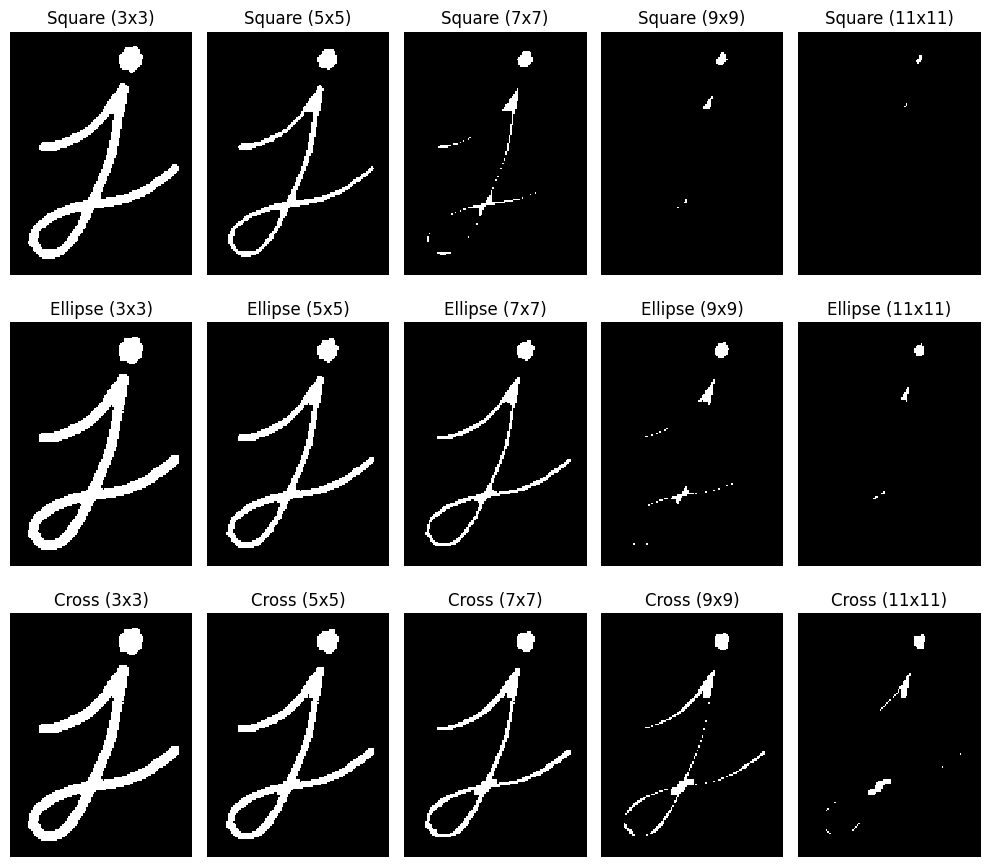

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 커널 크기 설정
kernel_sizes = [3, 5, 7, 9, 11]  # 사용할 커널 크기 목록

# 이미지 불러오기 (이진화 처리 없이 원본 이미지 사용)
image = cv2.imread('morphology_j.png', cv2.IMREAD_GRAYSCALE)

# 이진화 처리 (이미지가 이미 이진화되어 있지 않을 경우)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 침식 연산을 적용한 이미지들을 저장할 리스트
eroded_images = []

# 커널 형태
kernel_types = ['Square', 'Ellipse', 'Cross']

for kernel_type in kernel_types:
    for size in kernel_sizes:
        if kernel_type == 'Square':
            kernel = np.ones((size, size), np.uint8)  # 사각형 커널
        elif kernel_type == 'Ellipse':
            kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size, size))  # 원형 커널
        else:
            kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (size, size))  # 십자형 커널
        
        # 침식 연산 수행
        eroded_image = cv2.erode(binary_image, kernel, iterations=1)
        
        # 결과 저장
        eroded_images.append((kernel_type, size, eroded_image))

# 결과 출력
plt.figure(figsize=(10, 9))

# 커널 형태별로 행을 구성하여 결과 출력
for i, (kernel_type, size, eroded_image) in enumerate(eroded_images):
    # 행을 커널 형태별로 구분
    row = i // len(kernel_sizes)  # 커널 형태별로 행 구분
    col = i % len(kernel_sizes)   # 열은 커널 크기별로 구분
    
    plt.subplot(len(kernel_types), len(kernel_sizes), row * len(kernel_sizes) + col + 1)
    plt.title(f"{kernel_type} ({size}x{size})")
    plt.imshow(eroded_image, cmap='gray', interpolation='nearest')
    plt.axis("off")

plt.tight_layout()
plt.show()
